In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom_test, ttest_1samp, chi2_contingency, ttest_ind, f_oneway

In [2]:
FLAT_FILE_DIR = "../flat_files/"

full_table = pd.read_csv(FLAT_FILE_DIR + "full_table.csv")
event_table = pd.read_csv(FLAT_FILE_DIR + "event_table.csv")
deck_list_table = pd.read_csv(FLAT_FILE_DIR + "deck_list_table.csv")
pilot_table = pd.read_csv(FLAT_FILE_DIR + "pilot_table.csv")
deck_table = pd.read_csv(FLAT_FILE_DIR + "deck_table.csv")
card_table = pd.read_csv(FLAT_FILE_DIR + "card_table.csv")

event_table["date"] = pd.to_datetime(event_table["date"])
full_table["date"] = pd.to_datetime(full_table["date"])

In [3]:
# Common Slices
illegal_decks = full_table[
    ~full_table["cardId"].isin(card_table[card_table["standardLegality"] == "legal"]["cardId"])
]["deckId"]

first_place_decks = deck_table[
    (deck_table["rank"] == 1)
    & ~(deck_table["deckId"].isin(illegal_decks))
].copy()
main_decks = full_table[
    (~full_table["name"].isin(["Island", "Mountain", "Forest", "Plains", "Swamp"]))
    & (full_table["slot"] == "md")
    & ~(full_table["deckId"].isin(illegal_decks))
].copy()


In [4]:
deck_table.head()

,deckId,eventId,pilotId,deckUrl,name,rank,archetype,category
0,1,1,3,?e=27938&d=421597&f=ST,Gruul Aggro,1,aggro,gruul
1,2,1,4,?e=27938&d=421598&f=ST,UW Control,2,control,azorius
2,3,2,5,?e=27939&d=421599&f=ST,Red Deck Wins,1,aggro,mono red
3,4,3,6,?e=27940&d=421600&f=ST,Rakdos Aggro,1,aggro,rakdos
4,5,4,7,?e=27925&d=421512&f=ST,Gruul Aggro,1,aggro,gruul


In [5]:
card_table.head()

,setNumber,setName,name,cmc,color,mana_cost,standardLegality,oracle_text,cardId
0,001,eld,Acclaimed Contender,3,W,{2}{W},legal,When Acclaimed Contender enters the battlefiel...,001eld
1,002,eld,All That Glitters,2,W,{1}{W},legal,Enchant creature\nEnchanted creature gets +1/+...,002eld
2,003,eld,Archon of Absolution,4,W,{3}{W},legal,Flying\nProtection from white (This creature c...,003eld
3,004,eld,Ardenvale Paladin,4,W,{3}{W},legal,Adamant — If at least three white mana was spe...,004eld
4,005,eld,Ardenvale Tactician // Dizzying Swoop,3,W,{1}{W}{W} // {1}{W},legal,Flying // Tap up to two target creatures. (The...,005eld


In [6]:
first_place_decks.head()

,deckId,eventId,pilotId,deckUrl,name,rank,archetype,category
0,1,1,3,?e=27938&d=421597&f=ST,Gruul Aggro,1,aggro,gruul
2,3,2,5,?e=27939&d=421599&f=ST,Red Deck Wins,1,aggro,mono red
3,4,3,6,?e=27940&d=421600&f=ST,Rakdos Aggro,1,aggro,rakdos
4,5,4,7,?e=27925&d=421512&f=ST,Gruul Aggro,1,aggro,gruul
12,13,5,15,?e=27918&d=421478&f=ST,Rakdos Control,1,control,rakdos


In [7]:
(event_table.head())

,eventId,name,link,date,latest_set
0,1,FNM @ MTG Arena Campania,https://www.mtgtop8.com/event?e=27938&f=ST,2020-10-30,Zendikar Rising
1,2,Torneios @ Ludo Quest,https://www.mtgtop8.com/event?e=27939&f=ST,2020-10-30,Zendikar Rising
2,3,All Hallow's Eve FNM @ Gamer's Gauntlet,https://www.mtgtop8.com/event?e=27940&f=ST,2020-10-30,Zendikar Rising
3,4,Japan Championship 2020 Autumn Last Chance Tri...,https://www.mtgtop8.com/event?e=27925&f=ST,2020-10-29,Zendikar Rising
4,5,Free Daily @ Owl Central Games,https://www.mtgtop8.com/event?e=27918&f=ST,2020-10-28,Zendikar Rising


In [8]:
full_table.head()

,eventId,name_event,date,deckId,pilotId,name_deck,firstName,lastName,cardId,name,count,color,slot,archetype,category,latest_set
0,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,261znr,Cragcrown Pathway // Timbercrown Pathway,4,GR,md,aggro,gruul,Zendikar Rising
1,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,244eld,Fabled Passage,4,NaN,md,aggro,gruul,Zendikar Rising
2,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,266eld,Forest,9,G,md,aggro,gruul,Zendikar Rising
3,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,262eld,Mountain,5,R,md,aggro,gruul,Zendikar Rising
4,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,115eld,Bonecrusher Giant // Stomp,4,R,md,aggro,gruul,Zendikar Rising


In [9]:
full_table[~full_table["name_event"].str.contains("Arena")]

,eventId,name_event,date,deckId,pilotId,name_deck,firstName,lastName,cardId,name,count,color,slot,archetype,category,latest_set
53,2,Torneios @ Ludo Quest,2020-10-30,3,5,Red Deck Wins,Ricardo,Azeredo,262eld,Mountain,16,R,md,aggro,mono red,Zendikar Rising
54,2,Torneios @ Ludo Quest,2020-10-30,3,5,Red Deck Wins,Ricardo,Azeredo,115eld,Bonecrusher Giant // Stomp,4,R,md,aggro,mono red,Zendikar Rising
55,2,Torneios @ Ludo Quest,2020-10-30,3,5,Red Deck Wins,Ricardo,Azeredo,137eld,Rimrock Knight // Boulder Rush,4,R,md,aggro,mono red,Zendikar Rising
56,2,Torneios @ Ludo Quest,2020-10-30,3,5,Red Deck Wins,Ricardo,Azeredo,161znr,"Shatterskull Smashing // Shatterskull, the Ham...",3,R,md,aggro,mono red,Zendikar Rising
57,2,Torneios @ Ludo Quest,2020-10-30,3,5,Red Deck Wins,Ricardo,Azeredo,120eld,Embercleave,4,R,md,aggro,mono red,Zendikar Rising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76730,550,Free Daily - Bo1 @ Owl Central Games,2021-02-03,2868,1386,RDW,Adam,Bowles,141thb,Infuriate,1,R,md,aggro,mono red,Zendikar Rising
76731,550,Free Daily - Bo1 @ Owl Central Games,2021-02-03,2868,1386,RDW,Adam,Bowles,243eld,Dwarven Mine,3,R,md,aggro,mono red,Zendikar Rising
76732,550,Free Daily - Bo1 @ Owl Central Games,2021-02-03,2868,1386,RDW,Adam,Bowles,123khm,"Birgi, God of Storytelling // Harnfel, Horn of...",1,R,md,aggro,mono red,Zendikar Rising
76733,550,Free Daily - Bo1 @ Owl Central Games,2021-02-03,2868,1386,RDW,Adam,Bowles,136khm,Fearless Pup,4,R,md,aggro,mono red,Zendikar Rising


In [10]:
def most_winning_archetypes():
    first_place_decks.loc[first_place_decks["archetype"] == "rogue", "archetype"] = "mill"
    grouped_archetypes = first_place_decks.groupby("archetype")["rank"].sum().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
#     sns.barplot(data=grouped_archetypes, x="archetype", y="rank")
    plt.bar(range(len(grouped_archetypes)), grouped_archetypes["rank"])
    plt.xticks(range(len(grouped_archetypes)), grouped_archetypes["archetype"], rotation=30)
    plt.title("Most Winning Archetypes")
    plt.show()

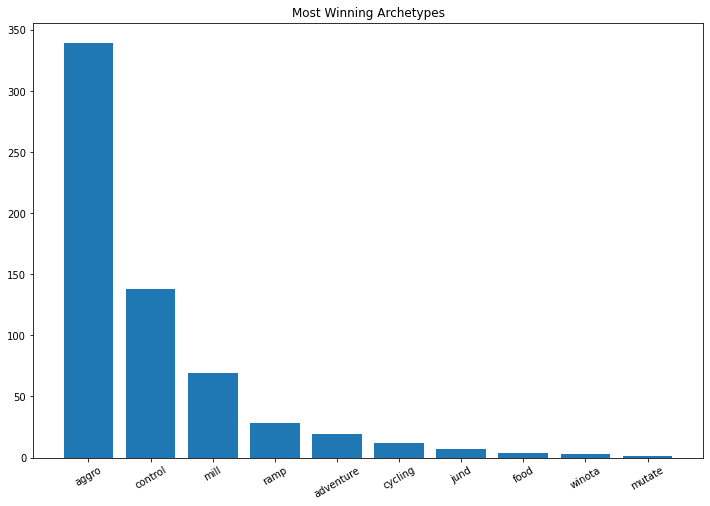

In [11]:
most_winning_archetypes()

In [12]:
def most_winning_colors(df):
    grouped_category = df.groupby("category")["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=grouped_category, x="category", y="rank")
    plt.title("Most Winning Colors")
    plt.xticks(rotation=30)
    plt.show()

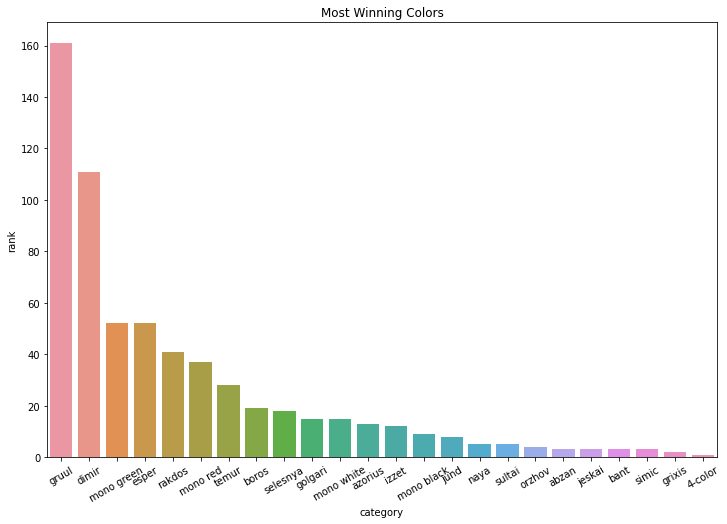

In [13]:
most_winning_colors(first_place_decks)

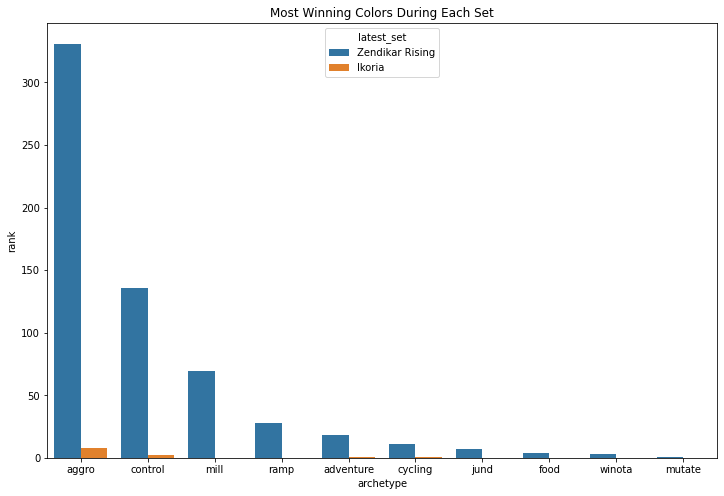

In [14]:
def most_winning_colors_by_set(df):
    merged_table = df.merge(event_table[["eventId", "latest_set"]], on="eventId", suffixes=[None, "_event"])
    grouped_table = merged_table.groupby(["archetype", "latest_set"])["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=grouped_table, x="archetype", y="rank", hue="latest_set")
    plt.title("Most Winning Colors During Each Set")
    plt.show()

most_winning_colors_by_set(first_place_decks)

In [15]:
def what_colors_go_with_archetype(archetypes, colors):
    archetypes = deck_table[deck_table["archetype"].isin(archetypes)]["archetype"]
    colors = deck_table[deck_table["category"].isin(colors)]["category"]
    frequencies = pd.crosstab(archetypes, colors)
    chi2, pval, _, expected = chi2_contingency(frequencies)
    return chi2, pval, frequencies, expected

what_colors_go_with_archetype(["aggro"], ["mono green", "gruul"])

(0.0,
 1.0,
 category   gruul  mono green
 archetype                   
 aggro        515         251,
 array([[515., 251.]]))

In [16]:
def colors_and_archetypes(df, archetype):
    df_archetype = df[df["archetype"] == archetype].copy()
    grouped_table = (
        df_archetype
        .groupby("category")["rank"]
        .count()
        .reset_index()
        .sort_values(by="rank", ascending=False)
    )
    plt.figure(figsize=(8, 5))
    sns.barplot(data=grouped_table, x="category", y="rank")
    plt.title(f"Categories in the Most Winning {archetype.title()} Decks")
    plt.xticks(rotation=30)
    plt.show()

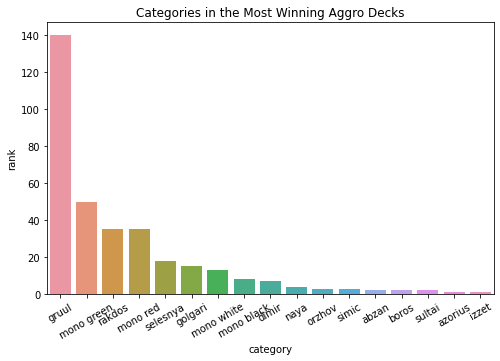

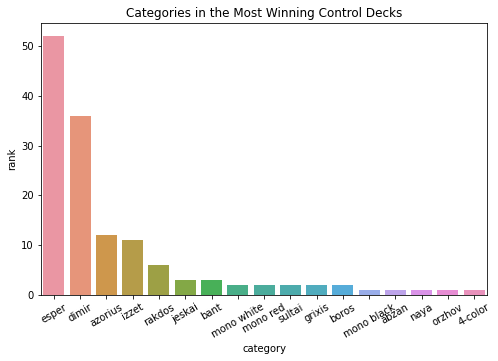

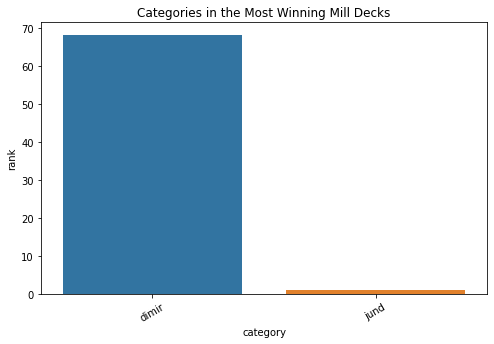

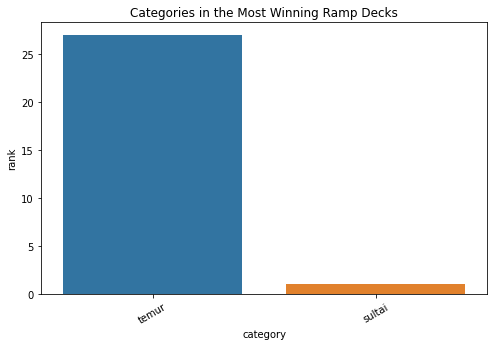

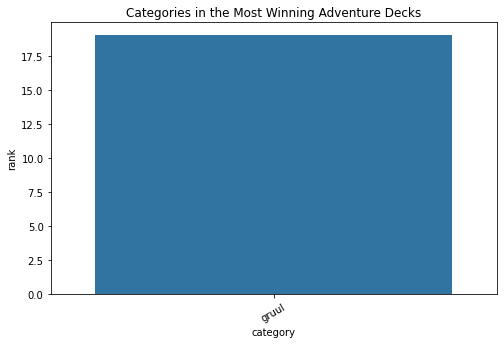

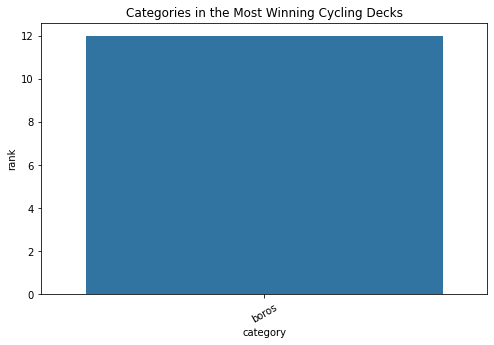

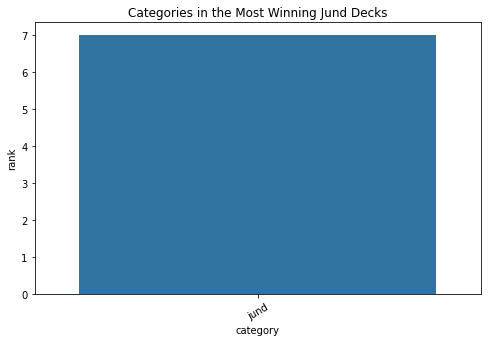

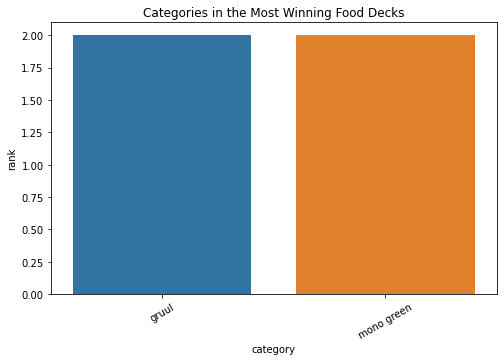

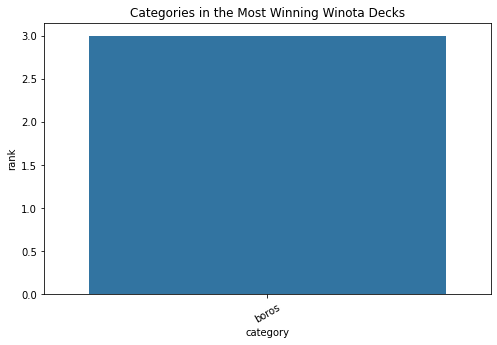

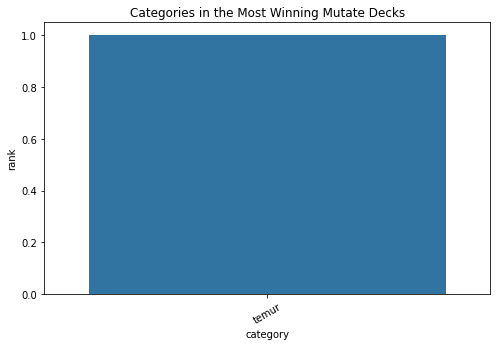

In [17]:
def top10_colors_archetypes(df):
    top10_archetypes = df["archetype"].value_counts().index[:10].tolist()
    for archetype in top10_archetypes:
        colors_and_archetypes(df, archetype)
#         plt.clf()

top10_colors_archetypes(first_place_decks)

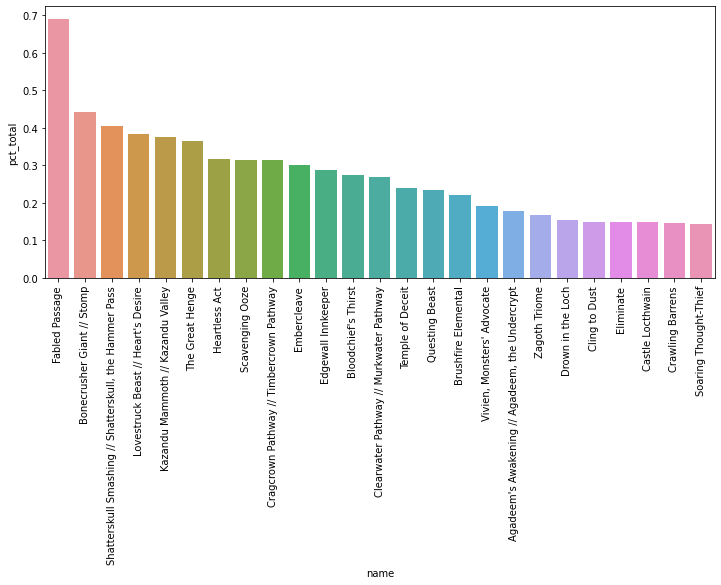

In [18]:
def most_used_cards(df):
    this_full_table = df.copy()
    grouped_table = (
        this_full_table
        .groupby("name")["deckId"]
        .nunique()
        .reset_index()
        .sort_values(by="deckId", ascending=False)
    )
    grouped_table["pct_total"] = grouped_table["deckId"].div(this_full_table["deckId"].nunique())
    plt.figure(figsize=(12, 5))
    sns.barplot(data=grouped_table.iloc[:25], x="name", y="pct_total")
    plt.xticks(rotation=90)
    plt.show()
    
most_used_cards(main_decks)

In [19]:
def most_used_cards_in_archetype(df, archetype):
    this_df = df[df["archetype"] == archetype].copy()
    grouped_df = (
        this_df.groupby("name")["deckId"]
        .nunique()
        .reset_index()
        .sort_values(by="deckId", ascending=False)
    )
    grouped_df["pct_total"] = grouped_df["deckId"] / this_df["deckId"].nunique()
    plt.figure(figsize=(12, 5))
    sns.barplot(data=grouped_df.iloc[:30], x="name", y="pct_total")
    plt.xticks(rotation=90)
    plt.title(f"Most Used Cards in {archetype.title()} Decks")
    plt.ylabel("Percent of All Cards")
    plt.xlabel("")
    plt.show()

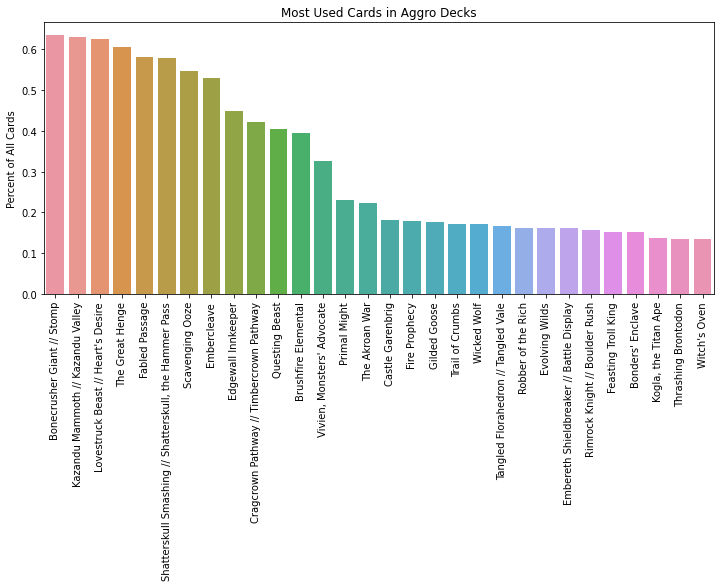

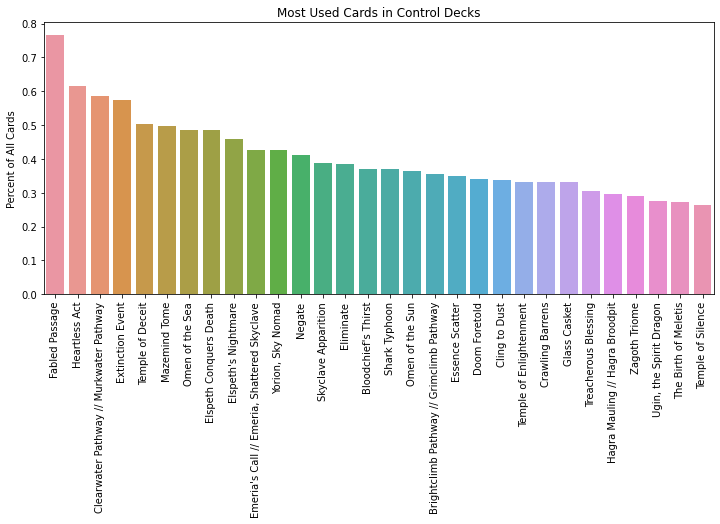

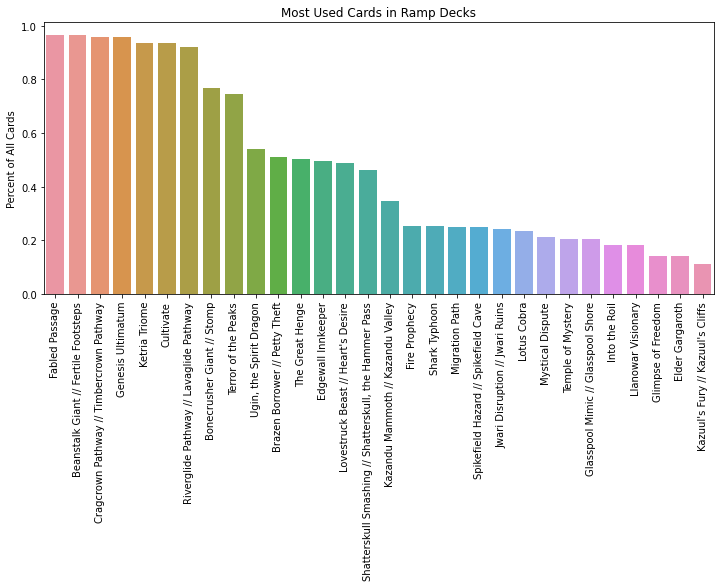

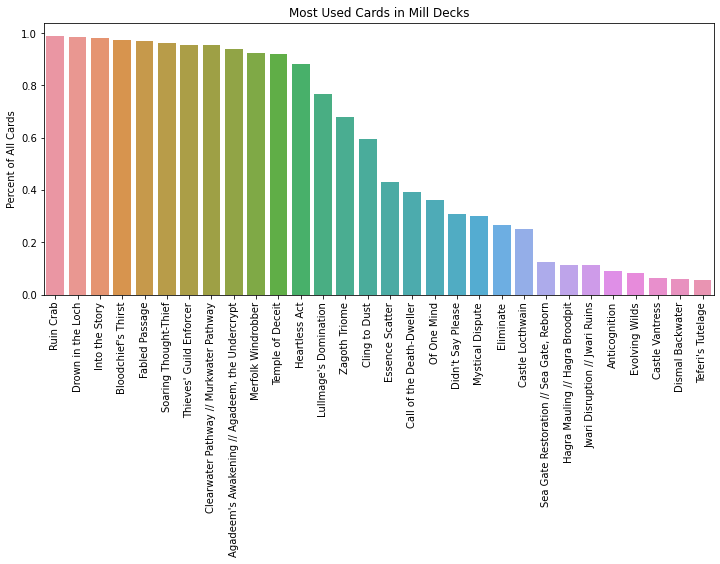

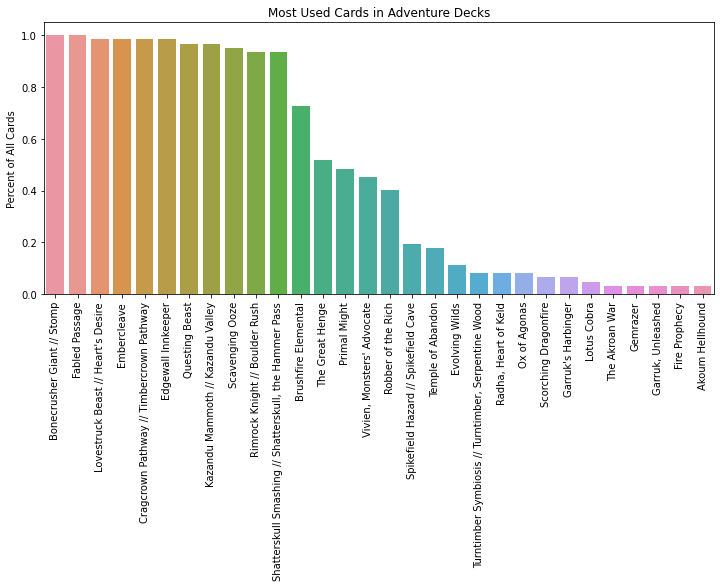

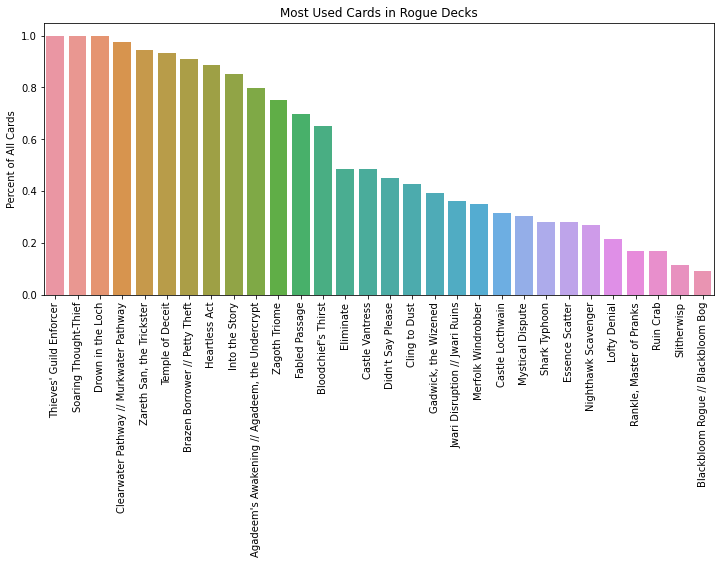

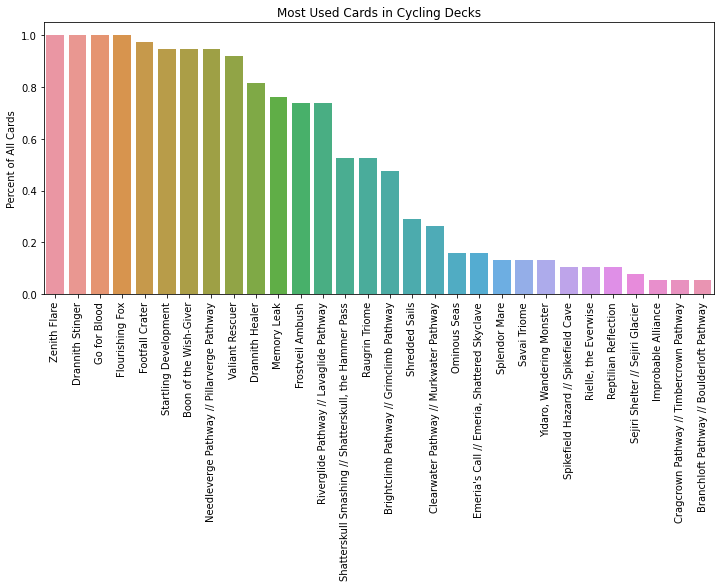

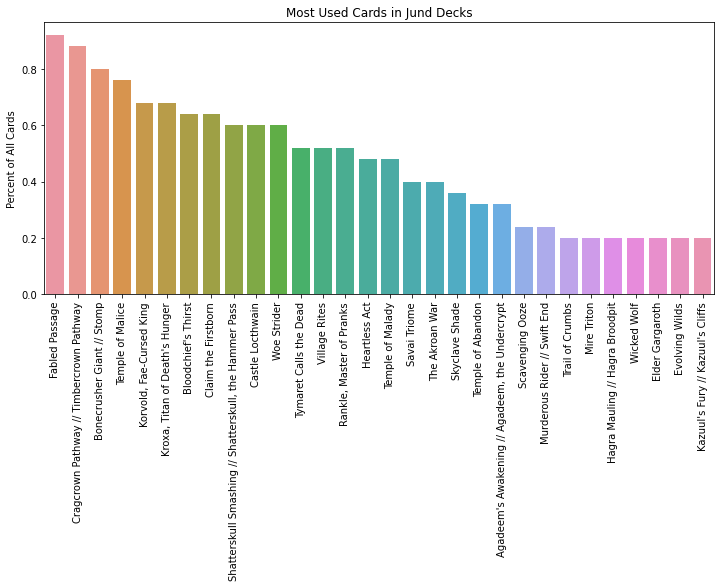

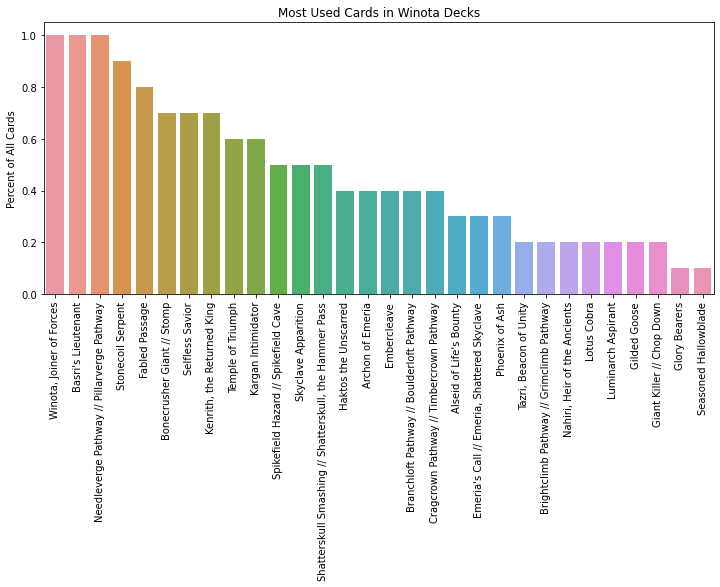

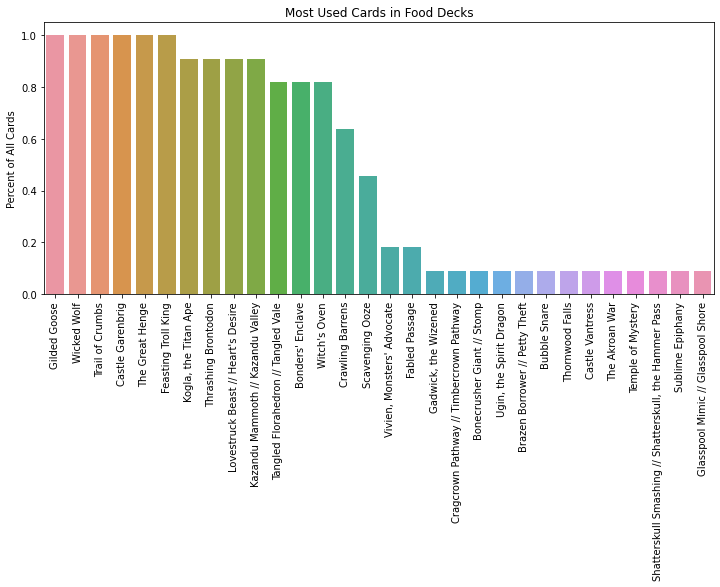

In [20]:
def top_10_archetypes(df):
    top_10_archetypes = deck_table["archetype"].value_counts().index[:10]
    for archetype in top_10_archetypes:
        most_used_cards_in_archetype(df, archetype)

top_10_archetypes(main_decks)

In [21]:
def most_used_cards_in_category(df, category):
    this_df = df[df["category"] == category].copy()
    grouped_df = (
        this_df.groupby("name")["deckId"]
        .nunique()
        .reset_index()
        .sort_values(by="deckId", ascending=False)
    )
    grouped_df["pct_total"] = grouped_df["deckId"] / this_df["deckId"].nunique()
    plt.figure(figsize=(12, 5))
    sns.barplot(data=grouped_df.iloc[:25], x="name", y="pct_total")
    plt.title(f"The Top Cards for {category.title()} Decks")
    plt.ylabel("Percent of Total Cards")
    plt.xlabel("")
    plt.xticks(rotation=90)
    plt.show()

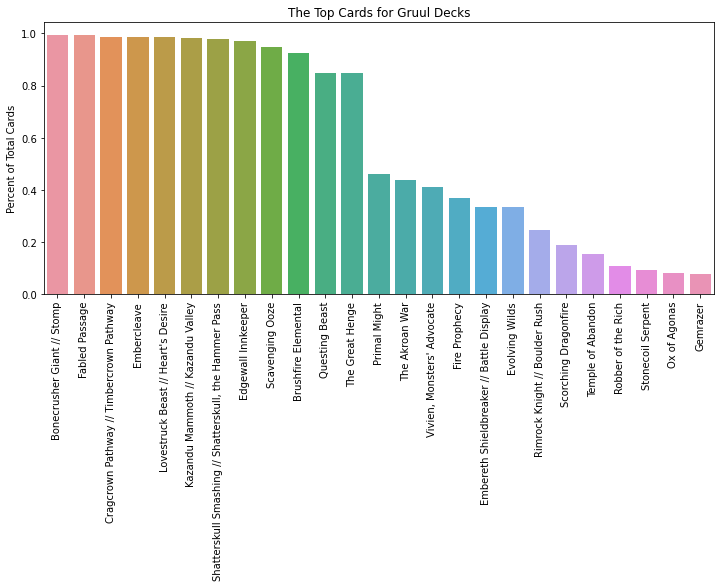

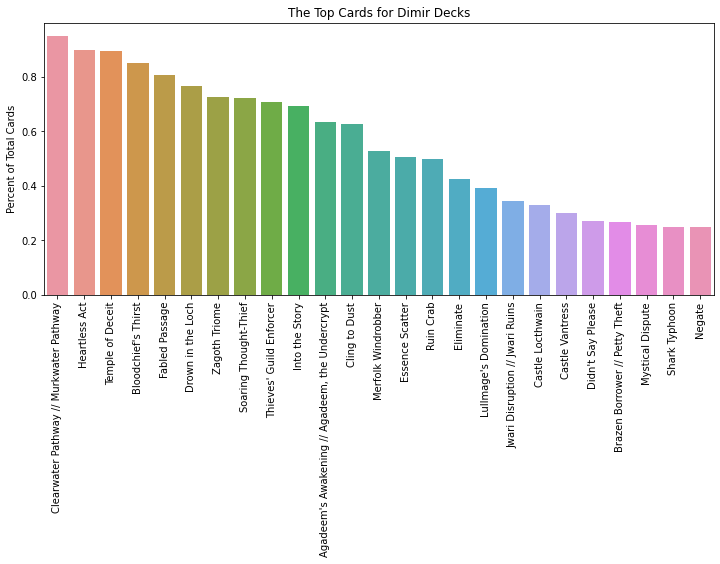

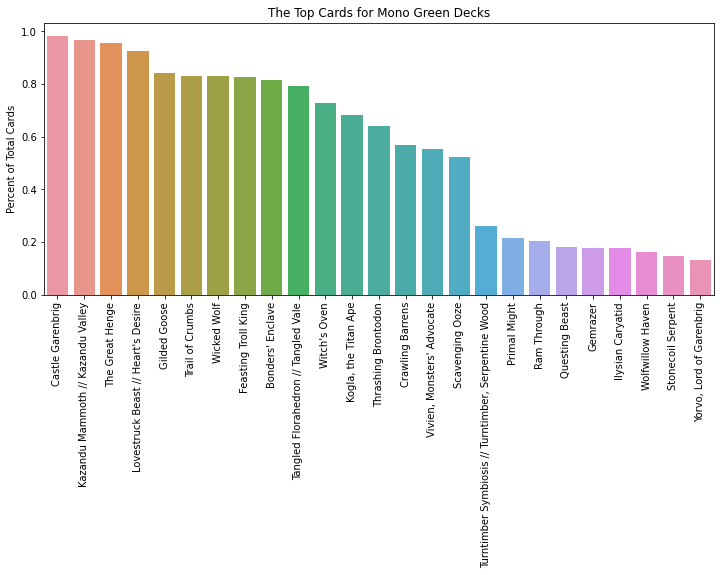

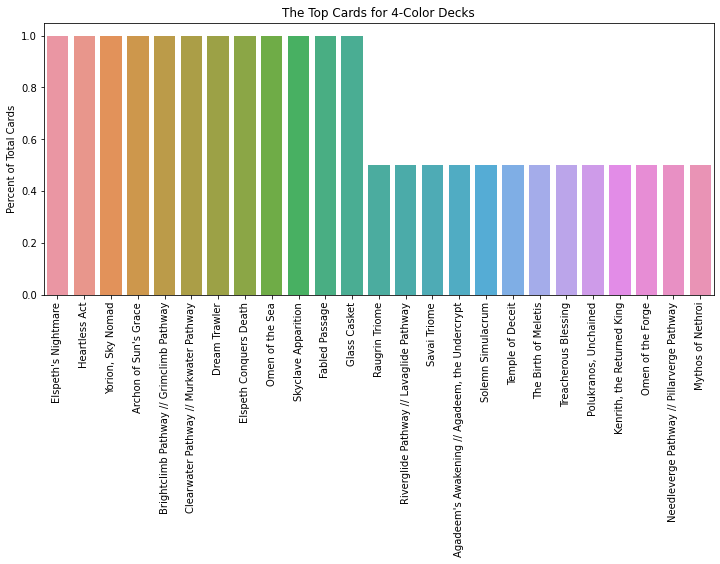

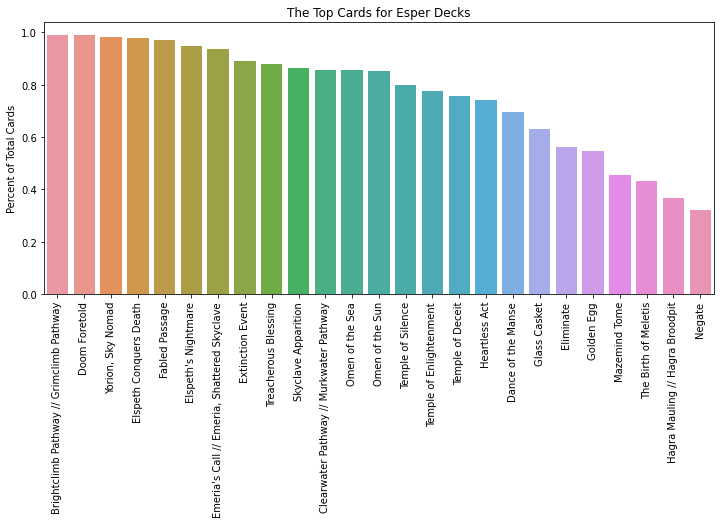

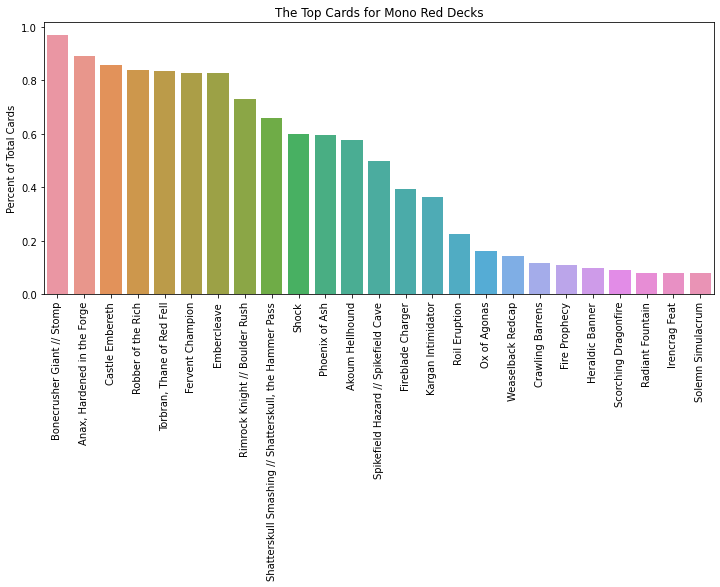

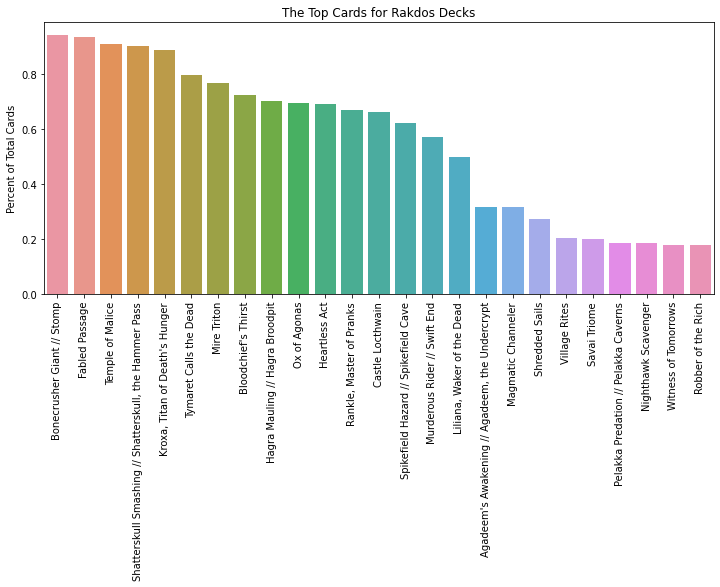

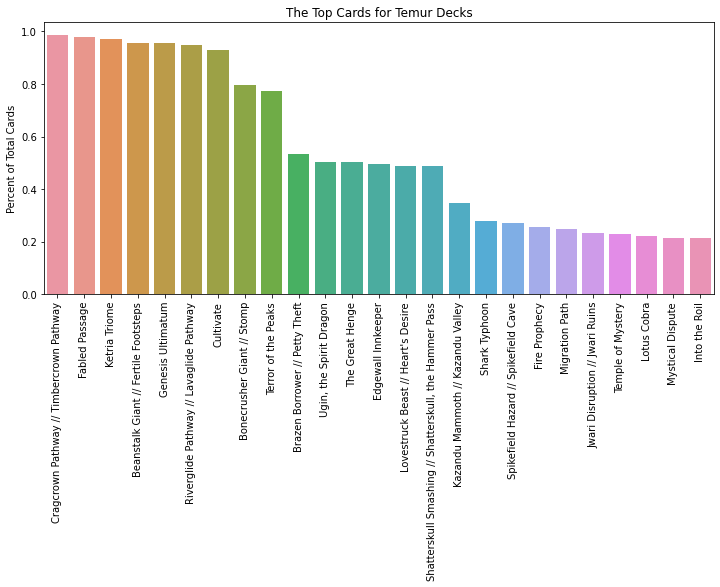

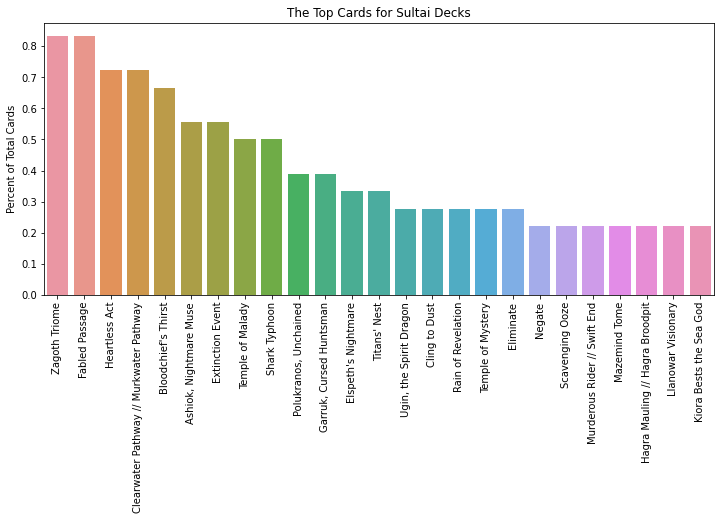

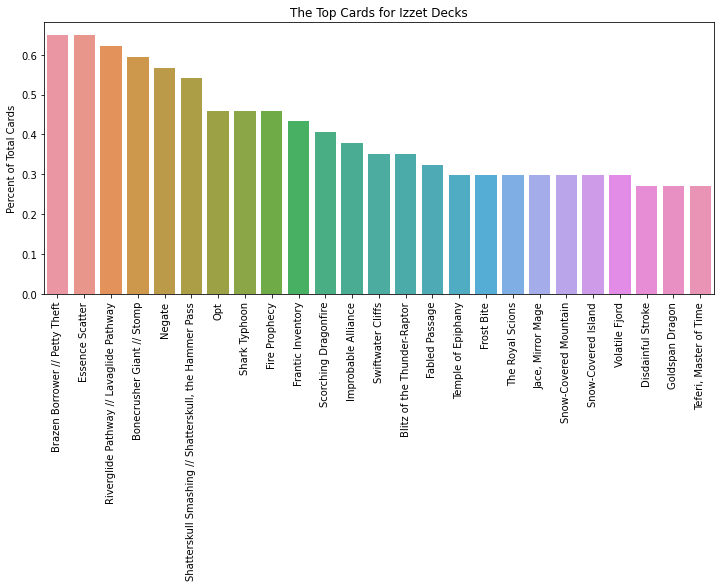

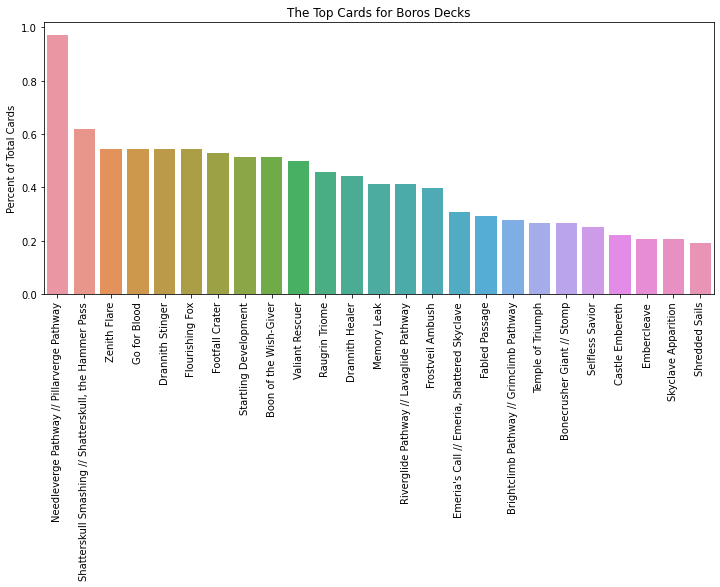

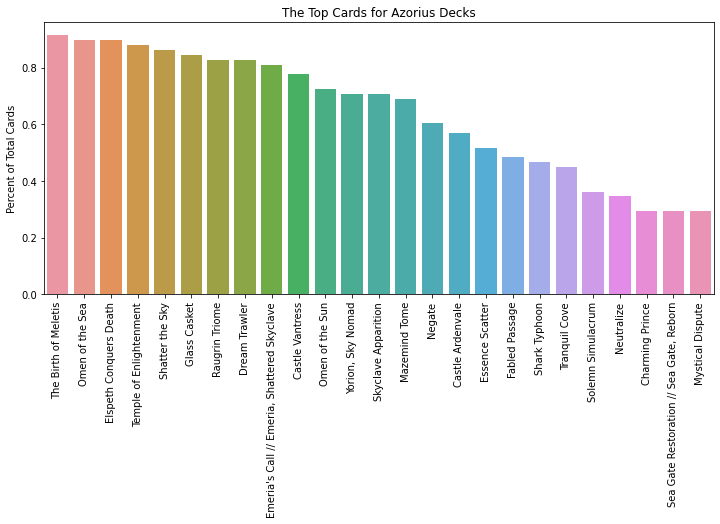

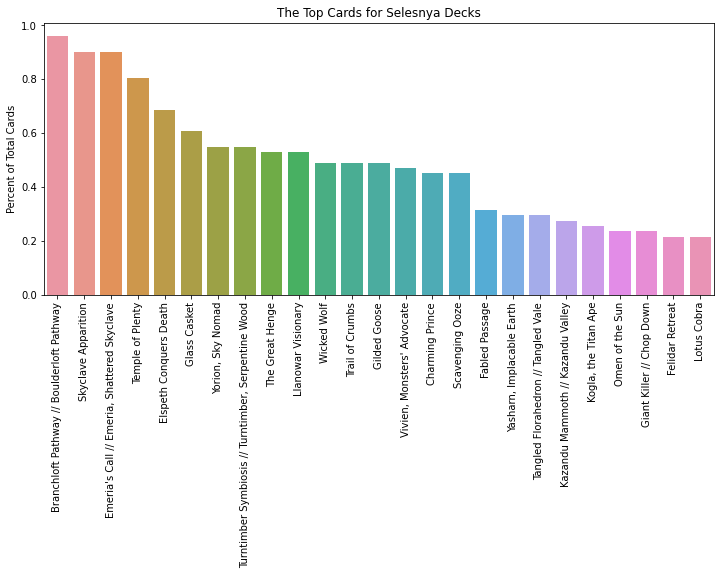

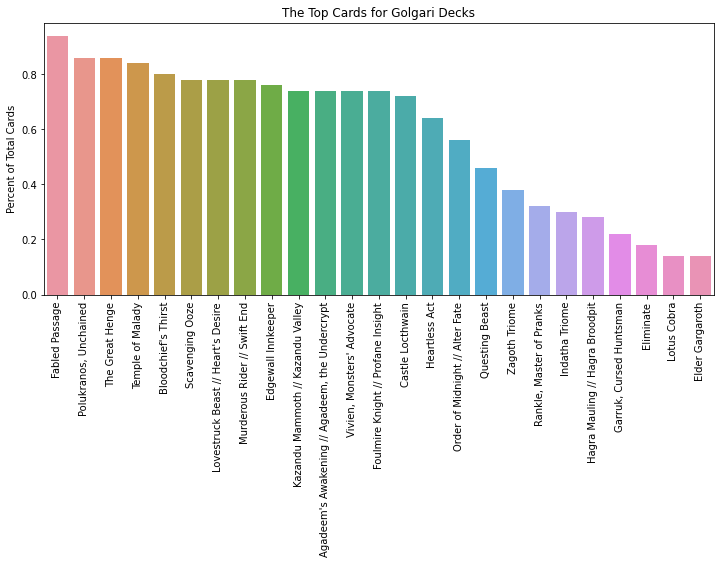

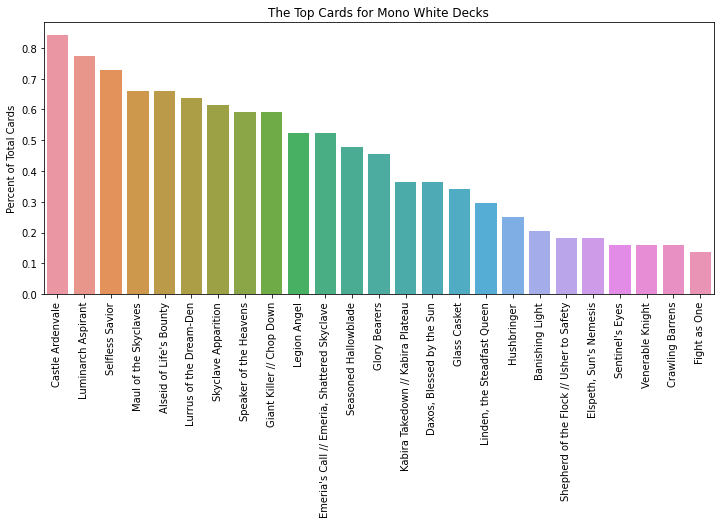

In [22]:
def top_15_categories(df):
    top_15_categories = deck_table["category"].value_counts().index[:15]
    for category in top_15_categories:
        most_used_cards_in_category(df, category)

top_15_categories(main_decks)

In [23]:
def cards_by_set(df, unique_cards=False):
    this_df = df[df["deckId"].isin(first_place_decks["deckId"])].copy()
    if unique_cards:
        this_df.drop_duplicates(subset="name", inplace=True)
    this_df["set"] = this_df["cardId"].str.extract(r"(\d{3})(\w{3})")[1]
    sns.countplot(x=this_df["set"], order=this_df["set"].value_counts().index)
    plt.show()
    

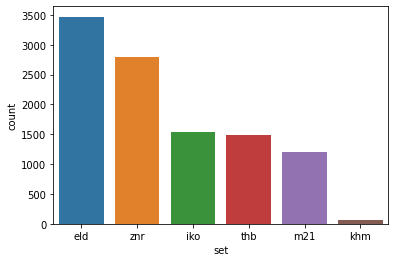

In [24]:
cards_by_set(main_decks)

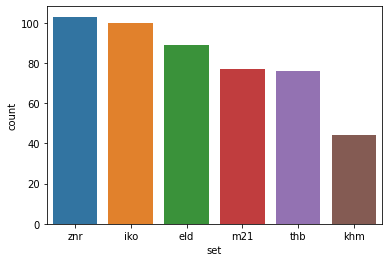

In [25]:
cards_by_set(main_decks,unique_cards=True)

In [26]:
def sort_by_date(df):
    date_order = []
    for year in ["2020", "2021"]:
        for month in [
            "January", "February", "March", "April", 
            "May", "June", "July", "August", 
            "September", "October", "November", "December"
        ]:
            date_order.append(f"{month} {year}")
    this_df = df.copy()
    
    this_df["month_year"] = pd.Categorical(
        this_df["date"].dt.month_name() + " " + (this_df["date"].dt.year).astype("str"),
        date_order,
        ordered=True
    )
    
    this_df["day"] = this_df["date"].dt.day
    
    return this_df.sort_values(by=["month_year", "day"])

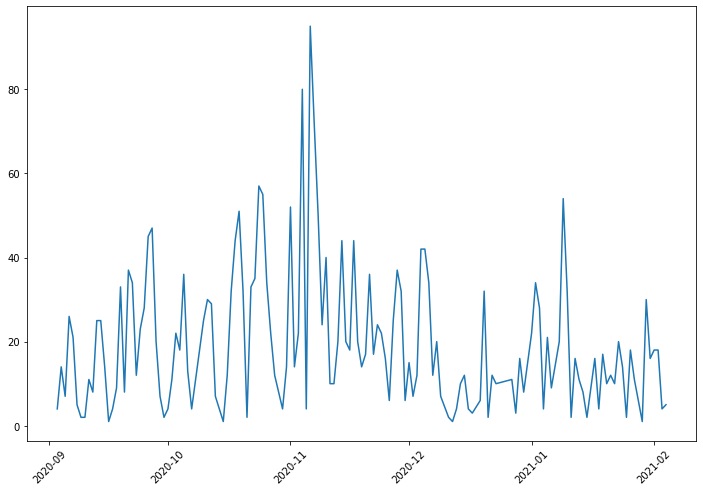

In [27]:
def number_of_decks_over_time(df):
    this_df = sort_by_date(df)
    grouped_df= (
        this_df
        .groupby(["date"])["deckId"]
        .nunique()
        .reset_index()
    )
    
    plt.figure(figsize=(12, 8))
    plt.plot(grouped_df["date"], grouped_df["deckId"])
    plt.xticks(rotation=45)
    plt.show()
    
    
number_of_decks_over_time(full_table)

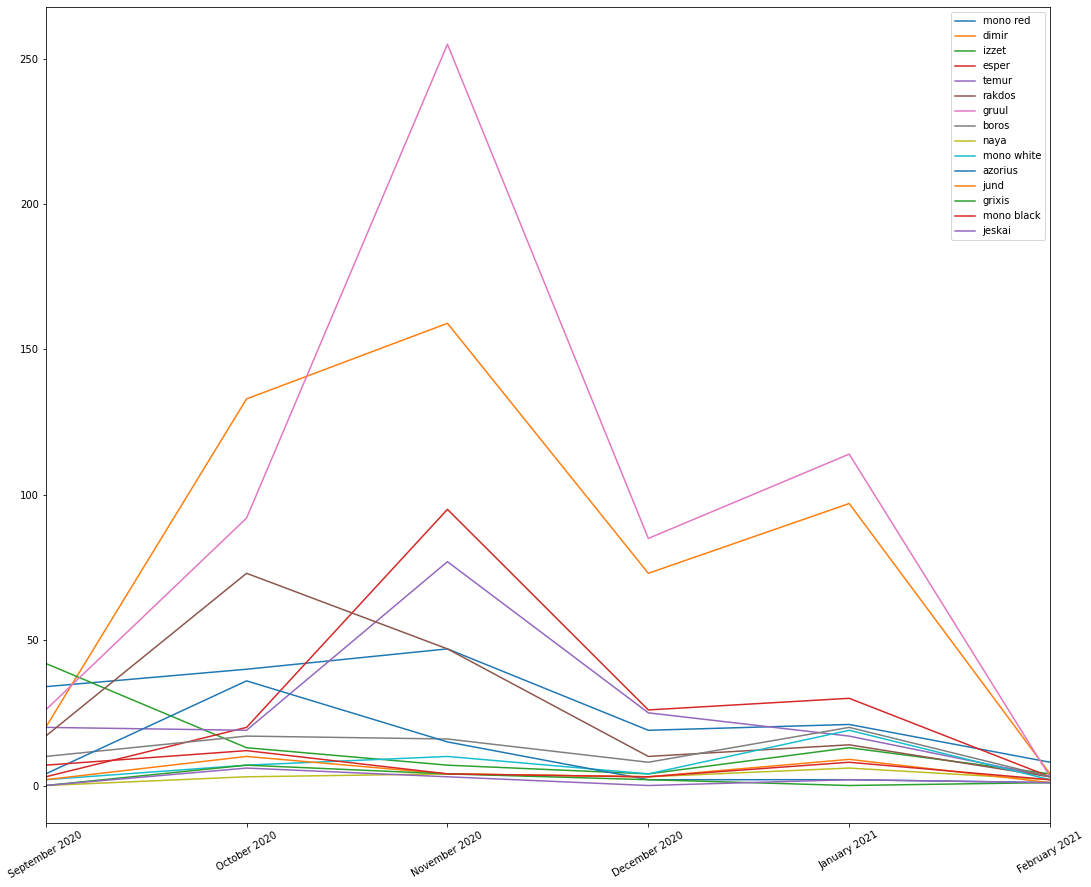

In [28]:
def categories_over_time(df):
    this_df = sort_by_date(df)
    
    grouped_df = (
        this_df
        .groupby(["month_year", "category"])["deckId"]
        .nunique()
        .reset_index()
    )
    top_categories = this_df[
        this_df["month_year"] == this_df["month_year"].max()
    ]["category"].value_counts().index[:15]
    
    plt.figure(figsize=(18, 15))
    for cat in top_categories:
        cat_df = grouped_df[grouped_df["category"]==cat]
        plt.plot(cat_df["month_year"], cat_df["deckId"], label=cat)
    
    plt.xticks(rotation=30)
    plt.xlim(["September 2020", "February 2021"])   
    plt.legend()
    plt.show()
    
categories_over_time(full_table)

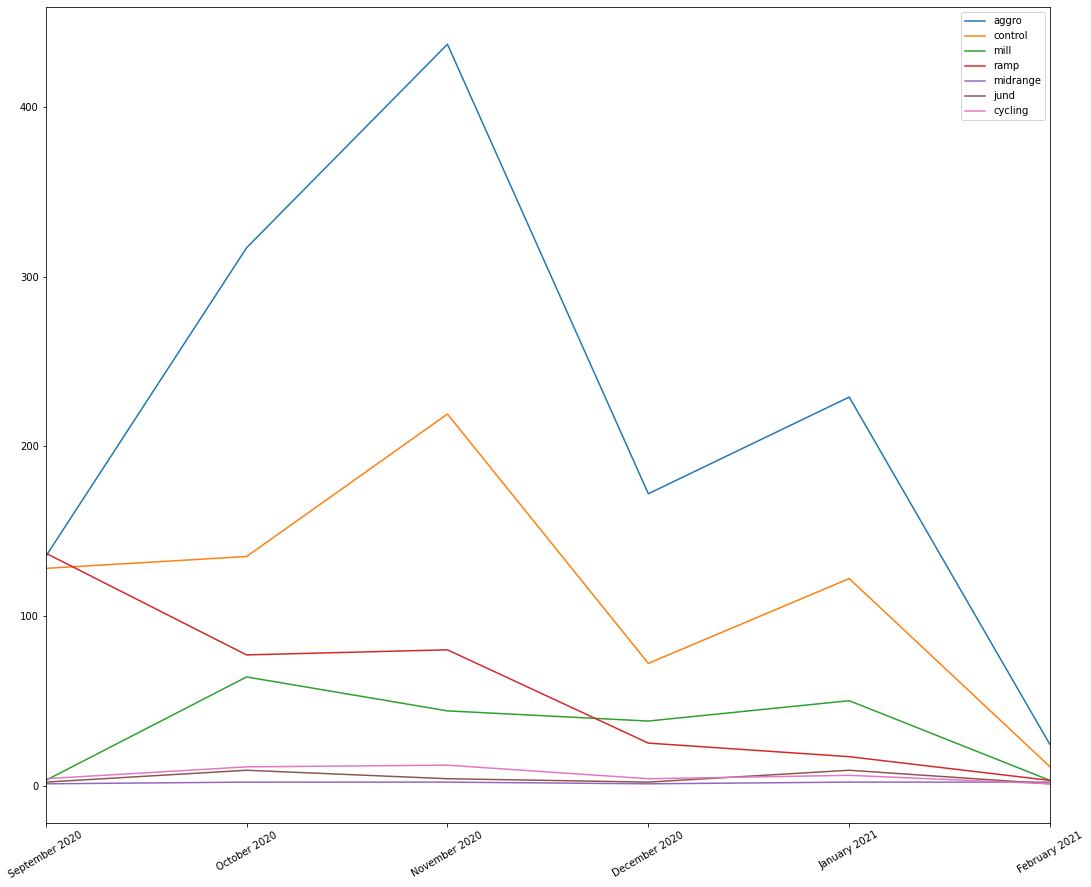

In [29]:
def archetypes_over_time(df):
    this_df = sort_by_date(df)
    
    grouped_df = (
        this_df
        .groupby(["month_year", "archetype"])["deckId"]
        .nunique()
        .reset_index()
    )
    top_archetypes = this_df[
        this_df["month_year"] == this_df["month_year"].max()
    ]["archetype"].value_counts().index[:15]
    
    plt.figure(figsize=(18, 15))
    for archetype in top_archetypes:
        archetype_df = grouped_df[grouped_df["archetype"]==archetype]
        plt.plot(archetype_df["month_year"], archetype_df["deckId"], label=archetype)
    
    plt.xticks(rotation=30)
    plt.xlim(["September 2020", "February 2021"])   
    plt.legend()
    plt.show()
    
archetypes_over_time(full_table)

In [30]:
def arena_vs_nonarena(df):
    this_df = df.copy()
    this_df["is_arena"] = df.apply(lambda x: "arena" if "arena" in x["name_event"].lower() else "not_arena", axis=1)
    arena_freq = pd.crosstab(this_df["archetype"], this_df["is_arena"])
    _, pval, _, _ = chi2_contingency(arena_freq)
    return pval
    

In [31]:
arena_vs_nonarena(full_table)

5.955827936635432e-160

In [32]:
cat_count = full_table["category"].value_counts()

In [33]:
cat_count

gruul         14248
dimir         13516
mono green     6184
esper          6050
4-color        6036
rakdos         4435
temur          4282
sultai         3582
mono red       3400
izzet          2380
azorius        1862
boros          1834
golgari        1470
selesnya       1358
mono white      981
jund            859
mono black      800
abzan           717
naya            483
orzhov          437
grixis          429
jeskai          392
bant            295
simic           268
mono blue       165
mardu           135
colorless        94
5-color          43
Name: category, dtype: int64

In [34]:
mask = full_table["category"].isin(cat_count[cat_count < 1000].index)

In [35]:
mask

0        False
1        False
2        False
3        False
4        False
         ...  
76730    False
76731    False
76732    False
76733    False
76734    False
Name: category, Length: 76735, dtype: bool

In [36]:
full_table[mask] = "Other"

In [37]:
full_table.dtypes

eventId       object
name_event    object
date          object
deckId        object
pilotId       object
name_deck     object
firstName     object
lastName      object
cardId        object
name          object
count         object
color         object
slot          object
archetype     object
category      object
latest_set    object
dtype: object

In [38]:
full_table["category"].value_counts()

gruul         14248
dimir         13516
mono green     6184
Other          6098
esper          6050
4-color        6036
rakdos         4435
temur          4282
sultai         3582
mono red       3400
izzet          2380
azorius        1862
boros          1834
golgari        1470
selesnya       1358
Name: category, dtype: int64

In [39]:
archetypes_over_time(full_table)

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
full_table["date"]